In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
sprocket_central = pd.ExcelFile('/Users/zhenliu15471/code/zliu15471/KPMG/raw_data/KPMG_VI_New_raw_data_update_final.xlsx')

df_tra = pd.read_excel(sprocket_central, 'Transactions', header=1)

df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)

df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)

df_add = pd.read_excel(sprocket_central, 'CustomerAddress', header=1)

/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_70150/2636081817.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)
/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_70150/2636081817.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)


In [3]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [7]:
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
df_newc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


# Data Exploration 

## new customers 

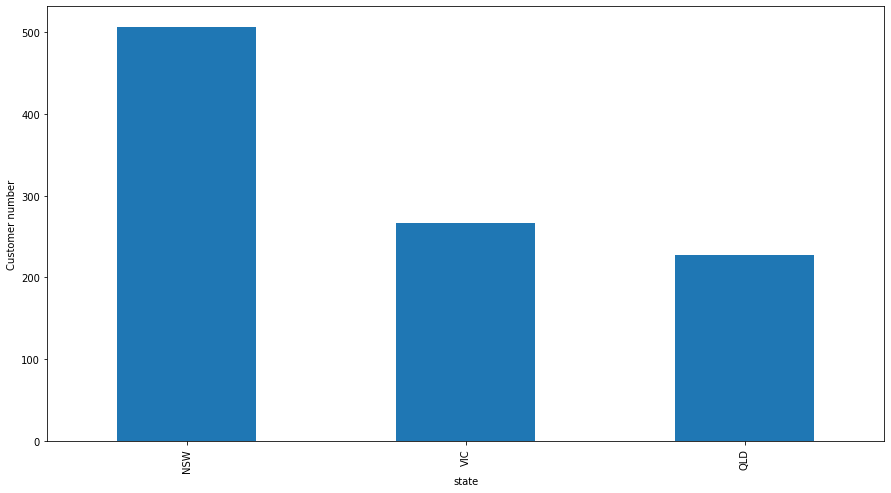

In [46]:
plt.figure(figsize=(15,8))
ax = df_newc.state.value_counts().plot.bar()
ax.set_xlabel("state")
ax.set_ylabel("Customer number");

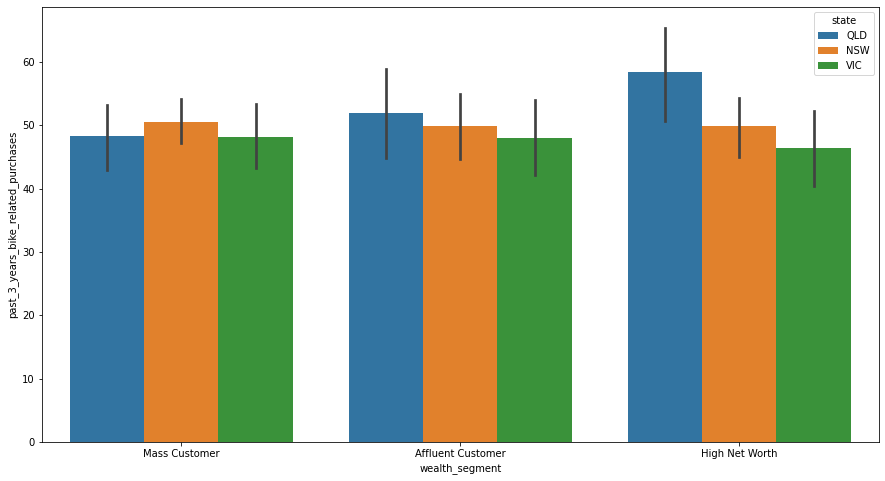

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='wealth_segment', y = 'past_3_years_bike_related_purchases',hue = 'state' );

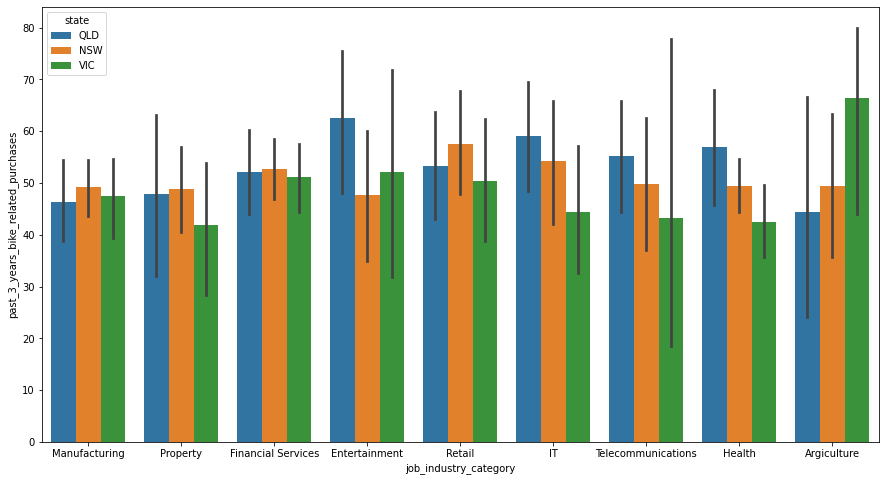

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='job_industry_category', y = 'past_3_years_bike_related_purchases',hue ='state' );

## Transactions

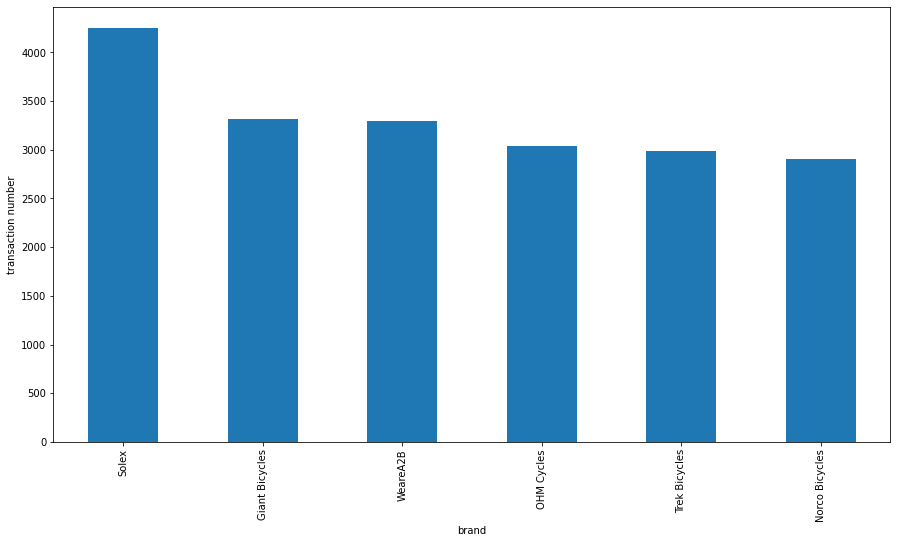

In [47]:
plt.figure(figsize=(15,8))
ax = df_tra.brand.value_counts().plot.bar();
ax.set_xlabel("brand")
ax.set_ylabel("transaction number");

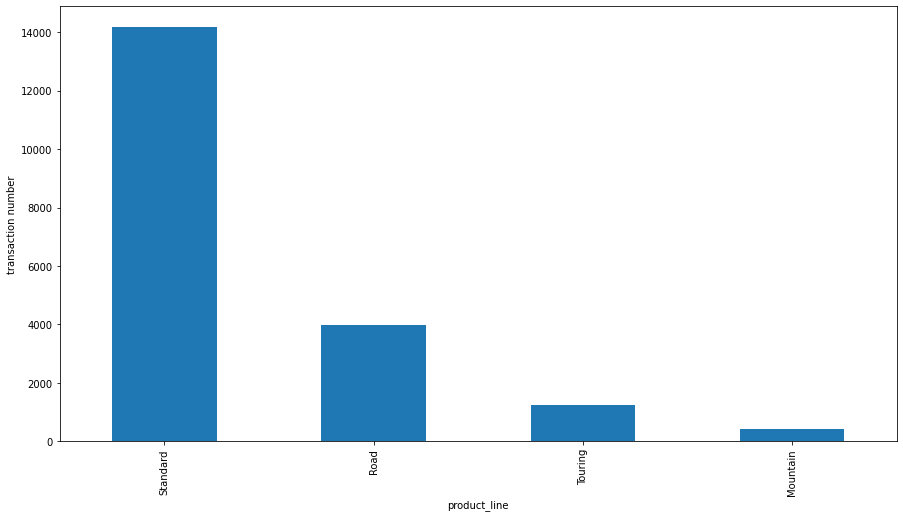

In [48]:
plt.figure(figsize=(15,8))
ax = df_tra.product_line.value_counts().plot.bar();
ax.set_xlabel("product_line")
ax.set_ylabel("transaction number");

# Feature Engineering